Linear Regression is used to predict continuous values. Use case eg.: Loan Amount Prediction,House Price Prediction,Insurance Amount Prediction etc.

Linear Regression:
1. Linear Regression is a regression model which tries to predict relationship between the dependent variable Y and independent variable X in linear fashion.In simple words it tries to find relationship between features and target variable by drawing a straight line.Equation of a line is: y=mx+c ,where m is the impact of independent variable on the dependent variable


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [ ]:
df=pd.read_excel("insurance.xlsx")

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check Feature Correlation

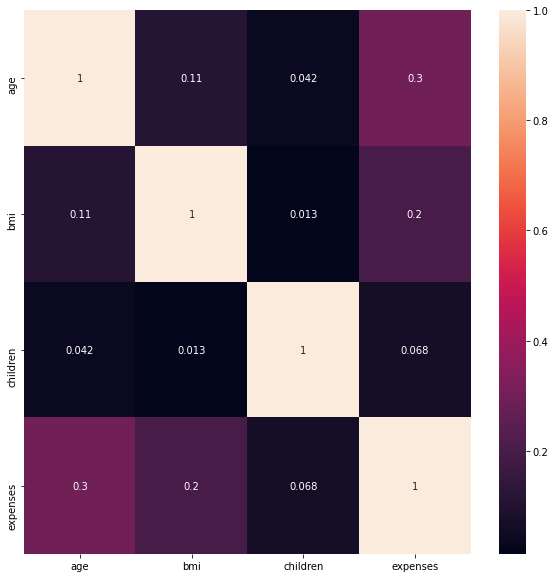

In [ ]:
fig,ax= plt.subplots(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True,ax=ax)

Label Encoding Object type

In [ ]:
d_types=dict(df.dtypes)
for name, type_ in d_types.items():
  if str(type_) == "object":
    print(f"<========= {name} ========>")
    print(df[name].value_counts())
    print()


<========= sex ========>
male      676
female    662
Name: sex, dtype: int64

<========= smoker ========>
no     1064
yes     274
Name: smoker, dtype: int64

<========= region ========>
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64



In [ ]:
from sklearn.preprocessing import LabelEncoder
for name, type_ in d_types.items():
  if str(type_) == "object":
    le=LabelEncoder()
    df[name]=le.fit_transform(df[name])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Splitting Dataset

In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
print(X.shape)
print(X)

(1338, 6)
[[19.   0.  27.9  0.   1.   3. ]
 [18.   1.  33.8  1.   0.   2. ]
 [28.   1.  33.   3.   0.   2. ]
 ...
 [18.   0.  36.9  0.   0.   2. ]
 [21.   0.  25.8  0.   0.   3. ]
 [61.   0.  29.1  0.   1.   1. ]]


In [ ]:
print(Y.shape)
Y

(1338,)


array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print("Shape of X_train is: ",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of Y_train is: ",Y_train.shape)
print("Shape of Y_test is: ",Y_test.shape)

Shape of X_train is:  (1070, 6)
Shape of X_test is:  (268, 6)
Shape of Y_train is:  (1070,)
Shape of Y_test is:  (268,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

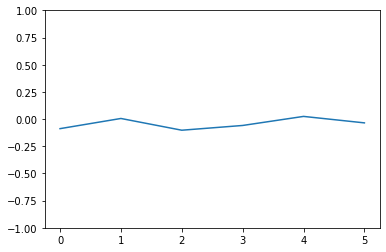

In [ ]:
#check whether the data is standardized or not
#mean should be 0
plt.ylim(-1,1)
means=[]
for i in range(X.shape[1]):
  means.append(np.mean(X_test[:,i]))
plt.plot(means, scaley=False)

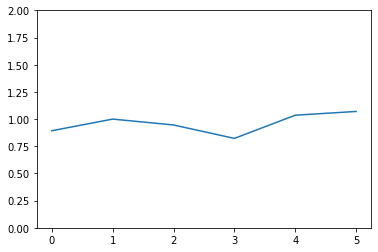

In [ ]:
#Check variance
plt.ylim(0,2)
vars=[]
for i in range(X.shape[1]):
  vars.append(np.var(X_test[:,i]))
plt.plot(vars)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([3732.1576253 , -180.9623548 , 1947.05093741,  491.85992684,
       9879.91019114, -493.7954718 ])

In [ ]:
model.intercept_

13479.206925233628

In [ ]:
#Y=W.X+c
model.coef_.dot(X_test[10,:]) + model.intercept_

3610.23562963563

In [ ]:
model.predict(X_test[10,:].reshape(1,-1))

array([3610.23562964])

## RFECV (Recursive Feature Elimination and cross validation): 
Eliminate unimportant features in recursive manner.It takes in 3 main parameters:
Model: the machine learning algorithm on which you want to train.
Step: Determines how many features we want to eliminate in one iteration,step of 1 is good choice.
Min_features_to_select: as RFECV is recursively iterating we need to stop it forcefully.There are two stooping conditions:
a. If we have tested out eliminating all the features for at least once.
b. If we have reached the minimum number of features threshold.

In [ ]:
df1=pd.read_excel("insurance.xlsx")

In [ ]:
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Label Encoding

In [ ]:
d_types=dict(df1.dtypes)
for name, type_ in d_types.items():
  if str(type_) == "object":
    print(f"<========= {name} ========>")
    print(df1[name].value_counts())
    print()


<========= sex ========>
male      676
female    662
Name: sex, dtype: int64

<========= smoker ========>
no     1064
yes     274
Name: smoker, dtype: int64

<========= region ========>
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64



In [ ]:
from sklearn.preprocessing import LabelEncoder
for name, type_ in d_types.items():
  if str(type_) == "object":
    le=LabelEncoder()
    df1[name]=le.fit_transform(df1[name])

Splitting dataset

In [ ]:
X1=df1.iloc[:,:-1].values
Y1=df1.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X1,Y1,test_size=0.2,random_state=4)
print("Shape of X_train is: ",Xtrain.shape)
print("Shape of X_test is: ",Xtest.shape)
print("Shape of Y_train is: ",Ytrain.shape)
print("Shape of Y_test is: ",Ytest.shape)

Shape of X_train is:  (1070, 6)
Shape of X_test is:  (268, 6)
Shape of Y_train is:  (1070,)
Shape of Y_test is:  (268,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)

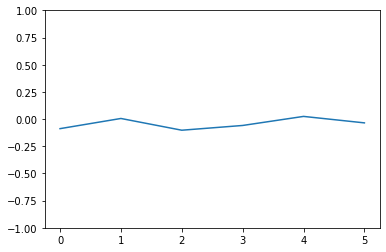

In [ ]:
#check whether the data is standardized or not
#mean should be 1
plt.ylim(-1,1)
means=[]
for i in range(X.shape[1]):
  means.append(np.mean(Xtest[:,i]))
plt.plot(means, scaley=False)

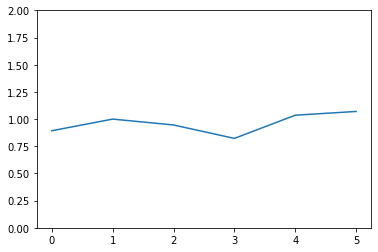

In [ ]:
#Check variance
plt.ylim(0,2)
vars=[]
for i in range(X.shape[1]):
  vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
model1=LinearRegression()
rfecv1=RFECV(model1,step=1,min_features_to_select=4,n_jobs=-1)
rfecv1.fit(Xtrain,Ytrain)

RFECV(cv=None,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=4, n_jobs=-1, scoring=None, step=1, verbose=0)

In [ ]:
#True or 1 means that the feature is important and False or 0 means that the feature is not important
print(rfecv1.support_)
rfecv1.ranking_

[ True  True  True  True  True  True]


array([1, 1, 1, 1, 1, 1])

In [ ]:
selected_features=np.where(rfecv1.support_)[0]
Xtrain=Xtrain[:,selected_features]
Xtest=Xtest[:,selected_features]
print(selected_features)

[0 1 2 3 4 5]


In [ ]:
model1.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Y=W.X+c
model1.coef_.dot(Xtest[10,:]) + model1.intercept_

3610.2356296356284

In [ ]:
model1.predict(Xtest[10,:].reshape(1,-1))

array([3610.23562964])

In [ ]:
model1.score(Xtest,Ytest)

0.6970404860952978

### K Folds Cross Validation

In [ ]:
df=pd.read_excel("insurance.xlsx")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
d_types=dict(df.dtypes)
for name, type_ in d_types.items():
  if str(type_) == "object":
    print(f"<========= {name} ========>")
    print(df[name].value_counts())
    print()

<========= sex ========>
male      676
female    662
Name: sex, dtype: int64

<========= smoker ========>
no     1064
yes     274
Name: smoker, dtype: int64

<========= region ========>
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64



In [ ]:
from sklearn.preprocessing import LabelEncoder
for name, type_ in d_types.items():
  if str(type_) == "object":
    le=LabelEncoder()
    df[name]=le.fit_transform(df[name])

In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

pca=PCA(n_components=4)
X=pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.2005898  0.18136641 0.16992163 0.16088738]


In [ ]:
from sklearn.model_selection import KFold
k_fold=KFold(n_splits=5)
test_scores=[]
for train_idx,test_idx in k_fold.split(X):
  Xtrain=X[train_idx]
  Ytrain=Y[train_idx]

  Xtest=X[test_idx]
  Ytest=Y[test_idx]

  model=LinearRegression()
  model.fit(Xtrain,Ytrain)

  test_scores.append(model.score(Xtest,Ytest))

Mean of test_scores: 0.4228110836486737


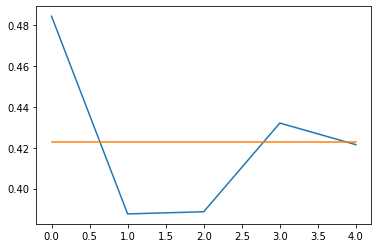

In [ ]:
print("Mean of test_scores:",np.mean(test_scores))
plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()

## Car Price Prediction

In [ ]:
data="https://raw.githubusercontent.com/SurabhiSuresh22/Car-Price-Prediction/master/car.csv"
car_df=pd.read_csv(data)

In [ ]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_df.shape

(301, 9)

In [ ]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_df=car_df.drop(["Car_Name"],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


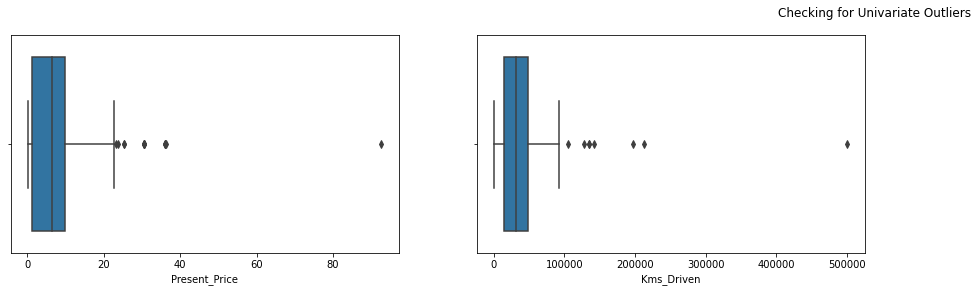

In [ ]:
plt.subplot(1,4,1)
sns.boxplot(car_df['Present_Price'])

plt.subplot(1,4,2)
sns.boxplot(car_df['Kms_Driven'])

plt.suptitle("Checking for Univariate Outliers")
plt.show()

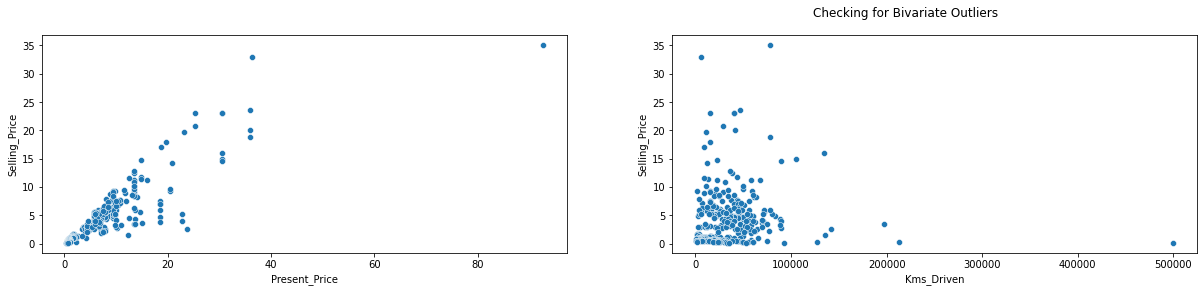

In [ ]:
#checking for bivariate outliers

plt.subplot(1,3,1)
sns.scatterplot(y=car_df['Selling_Price'],x=car_df['Present_Price'])

plt.subplot(1,3,2)
sns.scatterplot(y=car_df['Selling_Price'],x=car_df['Kms_Driven'])

plt.suptitle("Checking for Bivariate Outliers")
plt.show()

In [ ]:
# capping the outliers in the column Present_price having values greater then 80
car_df['Present_Price'].values[car_df['Present_Price'].values>80]=80

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [ ]:
car_df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
car_df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
car_df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car_df["Fuel_Type"]=le.fit_transform(car_df["Fuel_Type"])
car_df["Seller_Type"]=le.fit_transform(car_df["Seller_Type"])
car_df["Transmission"]=le.fit_transform(car_df["Transmission"])


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


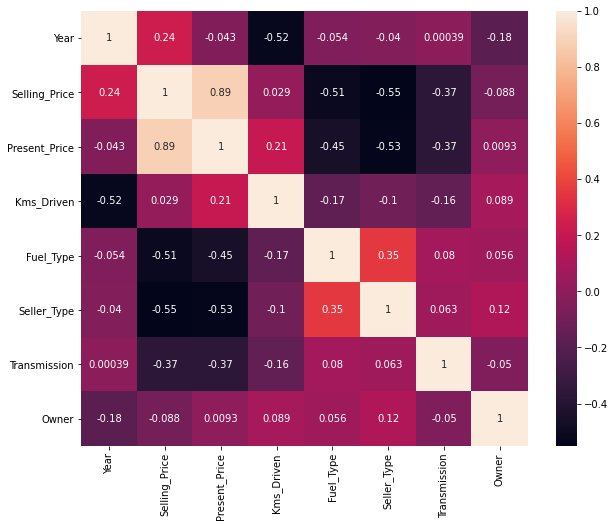

In [ ]:
fig,ax= plt.subplots(figsize=(10,8))
corr=car_df.corr()
sns.heatmap(corr,annot=True,ax=ax)

In [ ]:
X=car_df.drop(["Selling_Price"],axis=1)
Y=car_df["Selling_Price"]

In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X_std=sd.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_transform=pca.fit_transform(X_std)

In [ ]:
print(pca.explained_variance_ratio_)

[0.30042482 0.22289394 0.14570935 0.12596487]


In [ ]:
X_transform

array([[-0.24403698, -0.37968197, -0.40068613,  0.08265716],
       [ 1.29912833, -0.4531333 , -0.947945  ,  0.64745298],
       [-0.26192024, -1.40646153,  0.07952914,  0.30349485],
       ...,
       [ 0.91121848,  1.52983223, -1.11983788, -0.35517095],
       [ 1.01993484, -1.8824632 , -0.31820242,  0.96399663],
       [-0.50587523, -1.14031116, -0.08206488,  0.25849961]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_std,Y,test_size=0.2,random_state=4)

In [ ]:
from  sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([ 4.32524282,  6.2709283 ,  6.87573299,  6.31313427,  3.85995167,
       -0.75551022,  1.03566494,  0.17615766,  5.17760018,  2.93419708,
        0.42069447,  3.65569279,  5.4057155 ,  7.1871585 ,  5.09313589,
       -3.21732165,  9.70679673,  2.69961164,  4.15852712,  7.23953837,
       20.56781756,  1.53477395,  2.41686035,  0.49539469,  6.80508703,
        7.14772555,  2.29500098,  1.09160322,  8.79707546,  5.57682311,
        0.82981464,  4.24057964, -0.61884   ,  2.90868206,  7.86224398,
        6.03246453,  0.74869552,  3.71425893,  6.44978572, 10.41097703,
        2.87860501,  9.28421833,  4.41351305,  0.28271655,  0.34805983,
        1.69340904, -1.79487642,  7.16594902,  4.95803223,  6.61426958,
       10.37124597,  3.98159018,  7.2910117 ,  5.77503494,  1.71162213,
        2.18484065,  3.51947358,  1.81130899,  7.74735305, 21.70684613,
        0.36283381])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
294,3.75,4.325243
208,7.90,6.270928
18,3.25,6.875733
43,5.50,6.313134
241,4.75,3.859952
...,...,...
246,3.75,3.519474
156,0.48,1.811309
11,6.85,7.747353
64,33.00,21.706846


In [ ]:
input=(2014,5.59,27000,2,0,1,0)
input_data_as_numpy_array=np.asarray(input)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=sd.transform(input_data_reshaped)
prediction=model.predict(std_data)
print("Selling_price:",prediction)

Selling_price: [3.8013673]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 1.2243904805973367
Mean Squared Error: 4.1653560137322705
Root Mean Squared Error: 2.040920383976864


In [ ]:
print("Training set score: {:.2f}".format(model.score(X_train, Y_train)))
print("Test set score: {:.7f}".format(model.score(X_test, Y_test)))

Training set score: 0.89
Test set score: 0.8627978
